In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import queue as q


In [ ]:
class searchTraverser:  

  # Constructor 
  def __init__(self): 
    self.visited = []
    self.end_search = False

  
  def greedyBFS(self,graph, start_node, goal_node,heuristics):
    heuristics={}
    heuristics["Sports Complex"]=730
    heuristics["Siwaka"]=405
    heuristics["Ph.1A"]=380
    heuristics["Ph.1B"]=280
    heuristics["STC"]=213
    heuristics["Phase 2"]=210
    heuristics["Phase 3"]=160
    heuristics["J1"]=500
    heuristics["Mada"]=630
    heuristics["Parking Lot"]=0
    

    queue = []
    queue.append(start_node)
    #print(queue)
    #set of visited nodes
    self.visited.append(start_node)
    print("Greedy BFS implementation from Sports Complex to the Parking Lot",end="\n")

    while queue and not self.end_search: 
      # Dequeue a vertex from 
      s = queue.pop(0)          

      #Store explored nodes
      explored = {}  
     
      for i in list(graph[s]):
       explored[i] = heuristics[i]
        
      # Get the least heuristic value between two nodes 
      i = min(explored, key=explored.get)
      if i not in self.visited:
        print ("Command; Drive to " ,i, end = "\n")
        if i is goal_node:
          print("We have reached ",i," the final destination")
          self.visited.append(i)
          self.end_search = True
          break
        else:
          queue.append(i)
          #visited[i] = True
          self.visited.append(i)

    #function for ucs implementation
  def UCS(self,graph, start_node, goal_node):    
    queue = q.PriorityQueue()    
    path=[]
    explored_nodes = []
    priority=0

    distance={}
    queue.push((start_node,path),priority)
    distance[start_node]=0 
    self.visited.append(start_node) 
    while queue and not self.end_search: 
      # Dequeue a vertex from 
      current_node,path=queue.pop()     
      for i in list(graph[path]):
        if i not in self.visited:
          print ("Command; Drive to " ,i, end = "\n")
          if i is goal_node:
            print("We have reached ",i," the final destination")
            self.visited.append(i)
            self.end_search = True
            break
          else:
            queue.append(i)
            self.visited.append(i)

In [ ]:
#Initialize the graph
G = nx.Graph()

In [ ]:
#Add nodes to the graph
nodes=["Sports Complex","Siwaka","Ph.1A","Ph.1B","Mada","STC","Phase 2","Phase 3","J1","Mada","Parking Lot"]
G.add_nodes_from(nodes)
G.nodes()

NodeView(('Sports Complex', 'Siwaka', 'Ph.1A', 'Ph.1B', 'Mada', 'STC', 'Phase 2', 'Phase 3', 'J1', 'Parking Lot'))

In [ ]:
#Add the node edges and their weights
G.add_edge("Sports Complex","Siwaka",weight="450")
G.add_edge("Siwaka","Ph.1A",weight="10")
G.add_edge("Siwaka","Ph.1B",weight="230")
G.add_edge("Ph.1A","Ph.1B",weight="100")
G.add_edge("Ph.1A","Mada",weight="850")
G.add_edge("Ph.1B","STC",weight="50")
G.add_edge("Ph.1B","Phase 2",weight="112")
G.add_edge("Phase 2","STC",weight="50")
G.add_edge("Phase 2","J1",weight="600")
G.add_edge("J1","Mada",weight="200")
G.add_edge("Phase 2","Phase 3",weight="500")
G.add_edge("STC","Parking Lot",weight="250")
G.add_edge("Mada","Parking Lot",weight="700")
G.add_edge("Phase 3","Parking Lot",weight="350")



In [ ]:
#Position the nodes in the graph
G.nodes["Sports Complex"]['pos']=(-8,4)
G.nodes["Siwaka"]['pos']=(-4,4)
G.nodes["Ph.1A"]['pos']=(0,4)
G.nodes["Ph.1B"]['pos']=(0,0)
G.nodes["STC"]['pos']=(0,-4)
G.nodes["Phase 2"]['pos']=(4,0)
G.nodes["Phase 3"]['pos']=(8,-4)
G.nodes["J1"]['pos']=(8,0)
G.nodes["Mada"]['pos']=(12,0)
G.nodes["Parking Lot"]['pos']=(8,-8)

#Store the positions
node_position=nx.get_node_attributes(G,'pos')




In [ ]:
    heuristics={}
    heuristics["Sports Complex"]=730
    heuristics["Siwaka"]=405
    heuristics["Ph.1A"]=380
    heuristics["Ph.1B"]=280
    heuristics["STC"]=213
    heuristics["Phase 2"]=210
    heuristics["Phase 3"]=160
    heuristics["J1"]=500
    heuristics["Mada"]=630
    heuristics["Parking Lot"]=0

In [ ]:
#call greedyBFS to return set of  route to the goal
route=searchTraverser()
route_using_greedybfs =route.greedyBFS(G,"Sports Complex","Parking Lot",heuristics)

print("We have arrived to the destination(Parking Lot)")


Greedy BFS implementation from Sports Complex to the Parking Lot
Command; Drive to  Siwaka
Command; Drive to  Ph.1B
Command; Drive to  Phase 2
Command; Drive to  Phase 3
Command; Drive to  Parking Lot
We have arrived to the destination(Parking Lot)


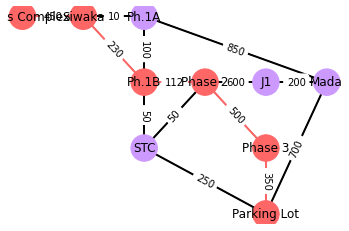

In [ ]:
#Label and color the nodes and edges to pink if are part of the path
route_list=route.visited
node_col = ['#CC99FF' if not node in route_list else '#FF6666' for node in G.nodes()]
pink_colored_edges = list(zip(route_list,route_list[1:]))
edge_col = ['black' if not edge in pink_colored_edges else '#FF6666' for edge in G.edges()]

#Store arc weight
arc_weight=nx.get_edge_attributes(G,'weight')

nx.draw_networkx_edge_labels(G, node_position,edge_labels=arc_weight)
nx.draw_networkx(G, node_position,node_color= node_col,node_size=700)
nx.draw_networkx_edges(G, node_position,edge_color=edge_col,width=2)
nx.draw_networkx_edge_labels(G, node_position, edge_labels=arc_weight)

plt.axis('off')
plt.show()


In [ ]:
route_using_ucs =route.UCS(G,"Sports Complex","Parking Lot")

print(route_using_ucs)

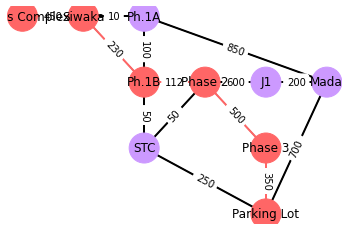

In [ ]:
#Label and color the nodes and edges to pink if are part of the path
route_ucs_list=route.visited
node_col = ['#CC99FF' if not node in route_ucs_list else '#FF6666' for node in G.nodes()]
pink_colored_edges = list(zip(route_ucs_list,route_ucs_list[1:]))
edge_col = ['black' if not edge in pink_colored_edges else '#FF6666' for edge in G.edges()]

#Store arc weight
arc_weight=nx.get_edge_attributes(G,'weight')

nx.draw_networkx_edge_labels(G, node_position,edge_labels=arc_weight)
nx.draw_networkx(G, node_position,node_color= node_col,node_size=900)
nx.draw_networkx_edges(G, node_position,edge_color=edge_col,width=2)
nx.draw_networkx_edge_labels(G, node_position, edge_labels=arc_weight)

plt.axis('off')
plt.show()